In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# 한글폰트 사용을 위해 설치

import koreanize_matplotlib

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import rc
rc('font', family ='AppleGothic')

pd.set_option('display.max_columns', None) # 모든 열 출력

In [ ]:
import yfinance as yf
import pandas as pd

# 설정
start_date = "2021-04-01"
end_date = pd.Timestamp.now().strftime("%Y-%m-%d")

# 티커 설정 (USD/KRW, USD/CNY)
tickers = ["KRW=X", "CNY=X"]

# 데이터 다운로드
data = yf.download(tickers, start=start_date, end=end_date)

# 종가 데이터만 선택
df_krw_usd = data['Close']['KRW=X']
df_cny_usd = data['Close']['CNY=X']

# 원화 대비 위안 환율 계산
df_krw_cny = df_krw_usd / df_cny_usd

# 데이터프레임 생성
df_krw_cny = pd.DataFrame({
    'Date': df_krw_cny.index,
    'KRW/CNY': df_krw_cny.values
})

# 인덱스를 Date로 설정
df_krw_cny.set_index('Date', inplace=True)
# csv 내보내기
df_krw_cny.to_csv('위안.csv')

In [22]:
df = pd.read_csv('리튬data.csv', encoding = 'cp949')
df

,기준일,기준가격,광물종합지수,희유금속지수,환율,시장전망지표,수산화리튬 수출 중량,수산화리튬 수입 중량,탄산리튬 수출 중량,탄산리튬 수입 중량,수산화리튬_무역수지,탄산리튬_무역수지,수급안정화지수
0,2021-06-09,81.0,2407.510943,1682.471447,174.527703,35.06,74.7,5111.1,123.5,4972.3,-59756,-47671,32.46
1,2021-06-10,81.0,2436.458355,1682.471447,174.807806,35.06,74.7,5111.1,123.5,4972.3,-59756,-47671,32.46
2,2021-06-11,81.0,2452.915918,1682.471447,173.843528,35.06,74.7,5111.1,123.5,4972.3,-59756,-47671,32.46
3,2021-06-15,81.0,2496.551463,1741.940418,174.501333,35.06,74.7,5111.1,123.5,4972.3,-59756,-47671,32.46
4,2021-06-16,81.0,2466.150328,1741.940418,174.243559,35.06,74.7,5111.1,123.5,4972.3,-59756,-47671,32.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,2024-05-14,106.5,2904.495116,1845.162442,188.569345,74.94,4.5,9358.9,504.6,2793.1,-160053,-41902,69.38
702,2024-05-15,103.5,2883.468771,1845.162442,188.397894,74.94,4.5,9358.9,504.6,2793.1,-160053,-41902,69.38
703,2024-05-16,103.5,2908.732163,1845.162442,187.538963,74.94,4.5,9358.9,504.6,2793.1,-160053,-41902,69.38
704,2024-05-17,103.5,2923.022685,1845.162442,186.509635,74.94,4.5,9358.9,504.6,2793.1,-160053,-41902,69.38


In [24]:
df['기준일'] = pd.to_datetime(df['기준일'])

# '기준일'을 인덱스로 설정
df.set_index('기준일', inplace=True)

### 상관관계

<AxesSubplot:>

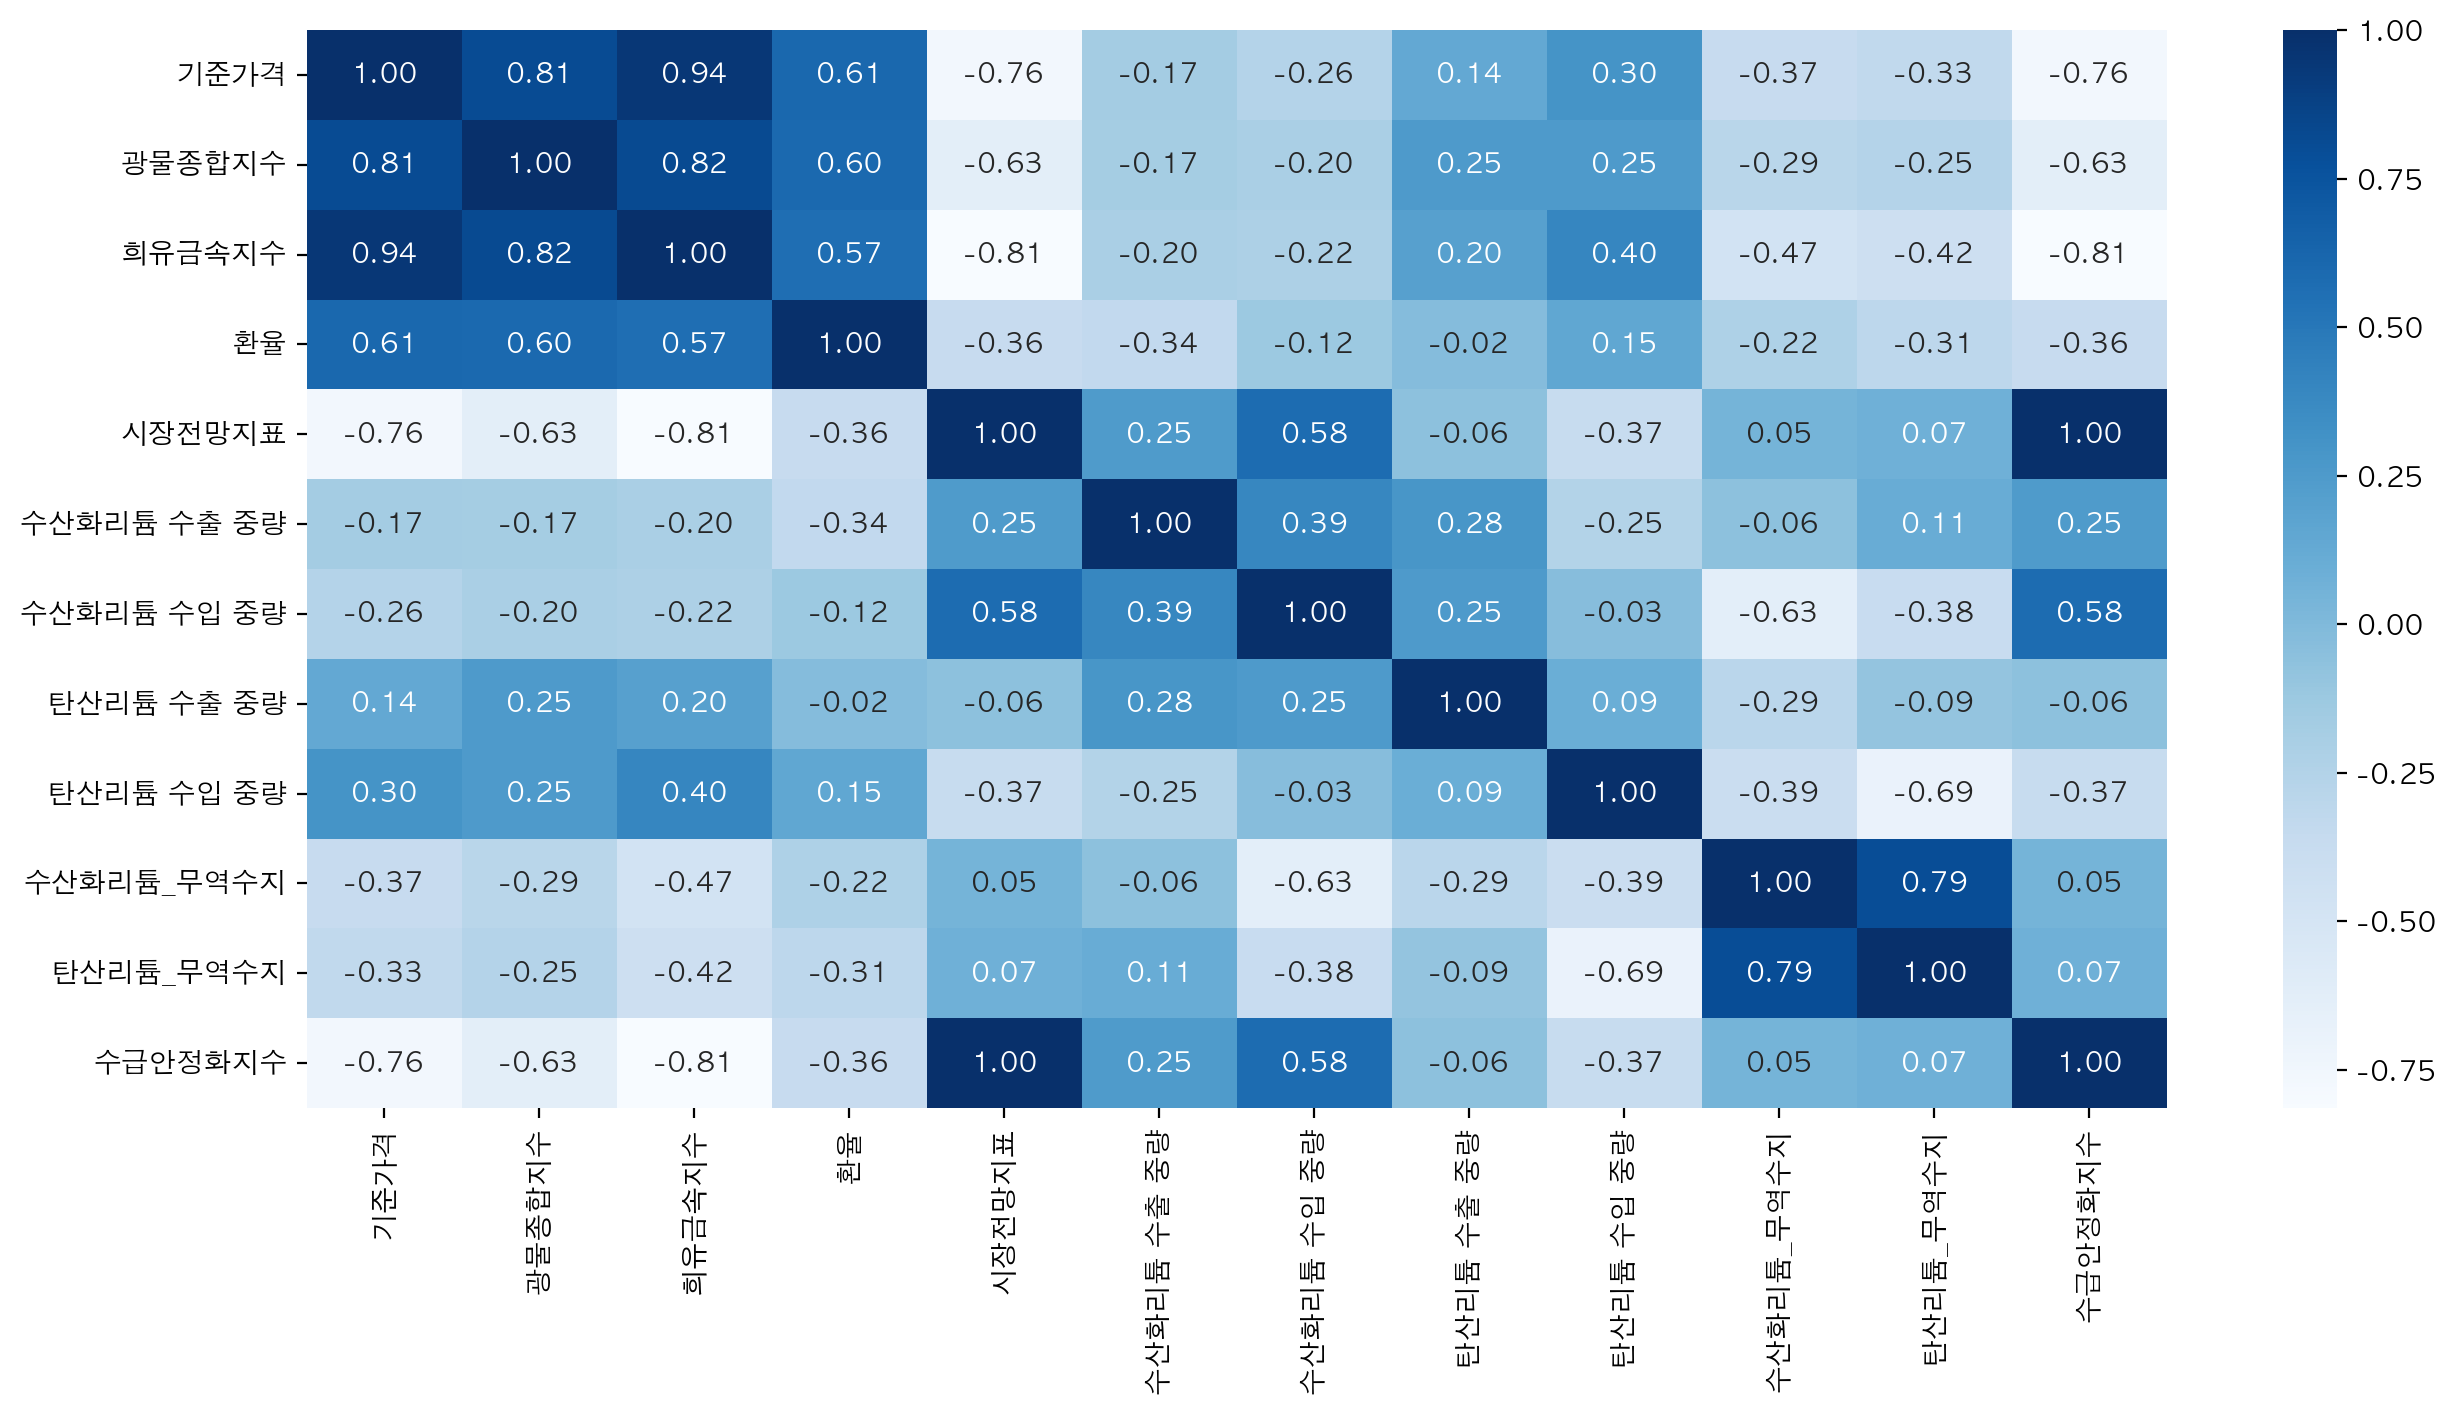

In [25]:
# 히트맵
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f")

- 기준가격과 광물파생지수끼리 높은 상관관계를 보인다 : 광물종합지수와 0.81, 희유금속지수와 0.94
- 환율과도 0.61라는 높은 상관계수를 보임. 추가적으로 살펴볼 필요성이 있음
- 시장전망지표와 수급안정화지수의 상관계수가 서로 1임. 삭제할 필요성 o

### 기준가격 plot

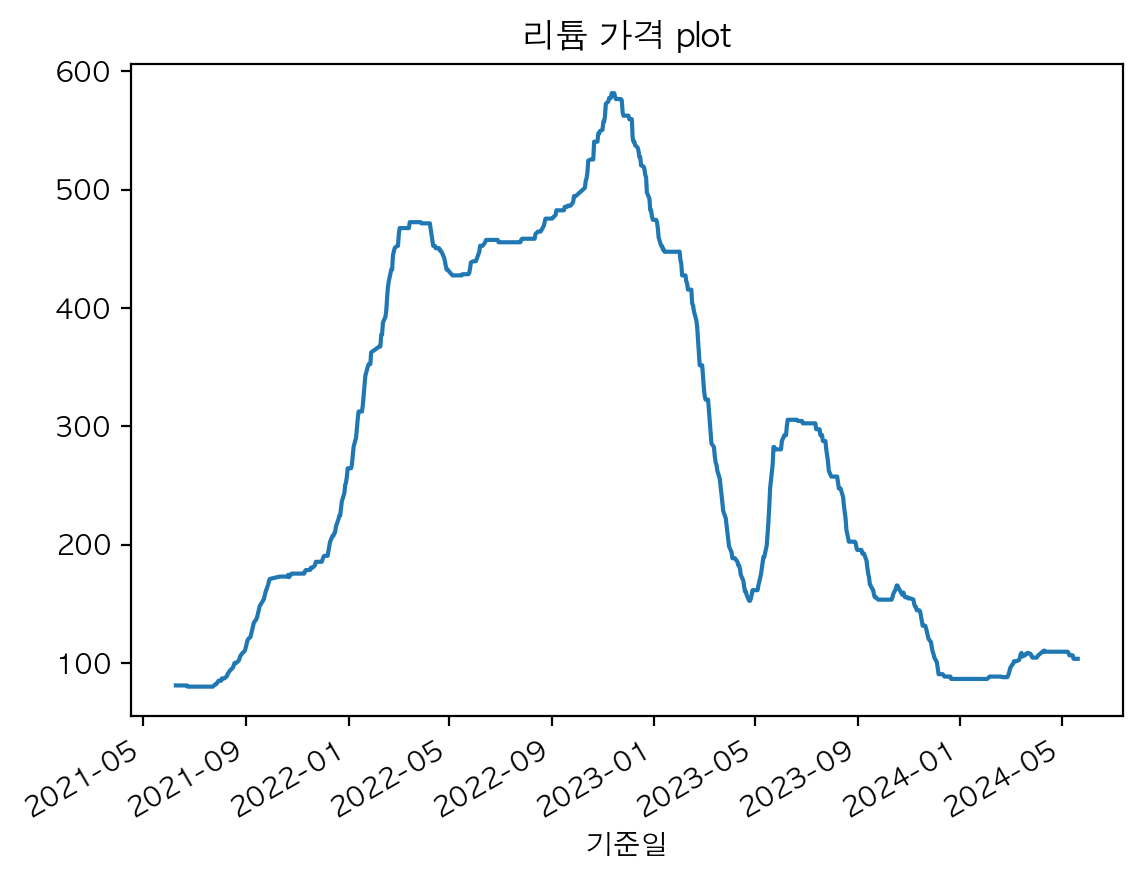

In [26]:
df['기준가격'].plot()
plt.title('리튬 가격 plot')
plt.show()

In [27]:
# 기준가격이 최고점을 찍었을 때 일자 2022-11-11
df['기준가격'].idxmax()

Timestamp('2022-11-11 00:00:00')

2022년 11월에 전기차 수요 증가로 인해 리튬 가격이 급등하고 있다는 뉴스기사가 존재함.

### 리튬 가격과 환율 사이의 관계

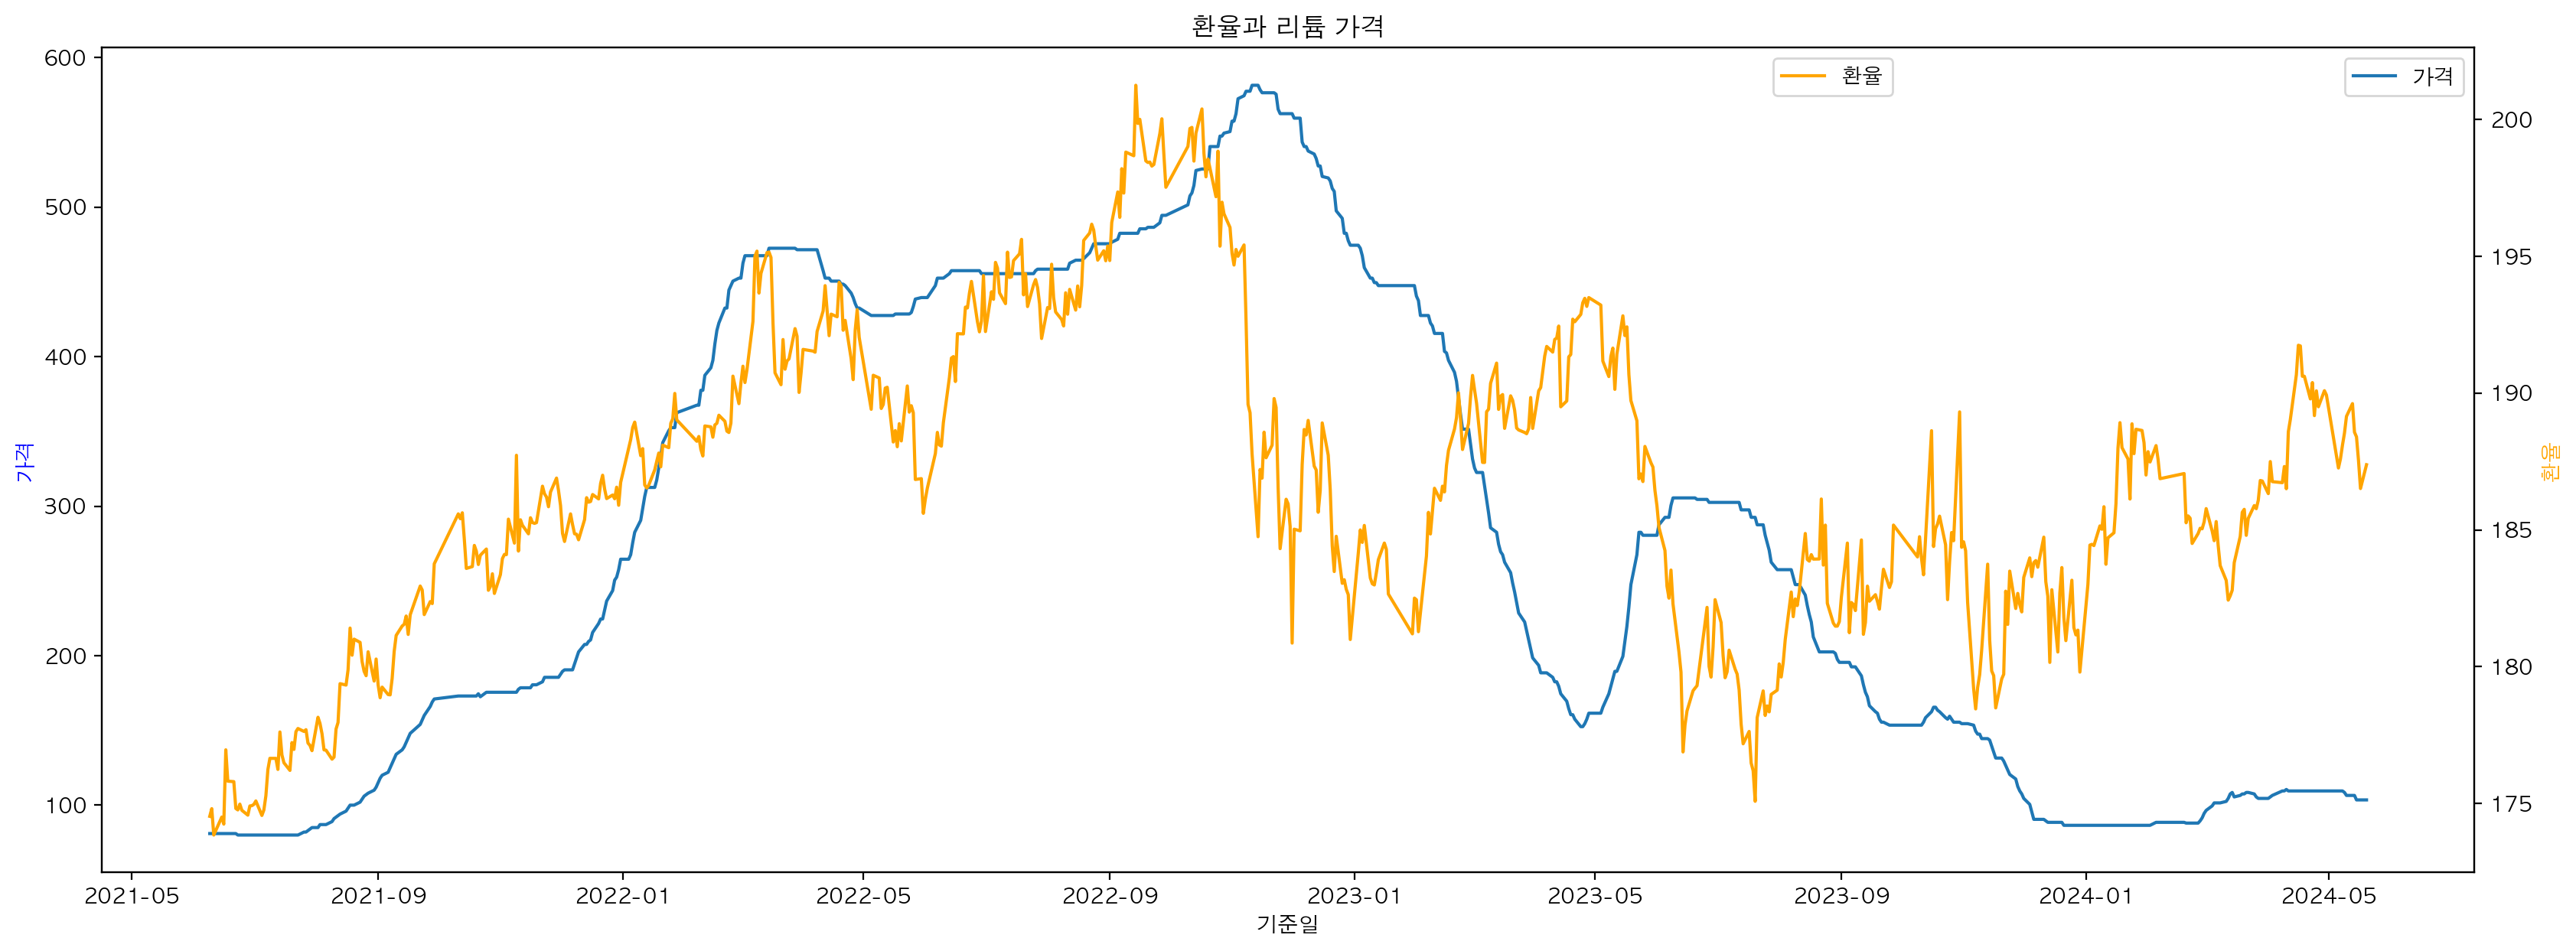

In [28]:
plt.figure(figsize=(20, 7))
# 기준가격에 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 환율에 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='환율', data=df, color='orange', label='환율', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('환율', color='orange')
# 타이틀과 범례 설정
plt.title('환율과 리튬 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()

- 가격과 환율은 0.61이라는 높은 상관계수를 보여주었음. 
- 따라서 추가적인 lineplot을 그려본 결과 2023년 1월까지는 비슷한 흐름을 보여주는 것을 알 수 있음. 
- 하지만 그 이후부터는 오히려 가격이 저점을 찍을 때 환율이 상승하는 모습과 가격이 상승할 때 환율이 내려가는 흐름을 보임. 

### 시장전망지표 vs 수급 안정화 지수

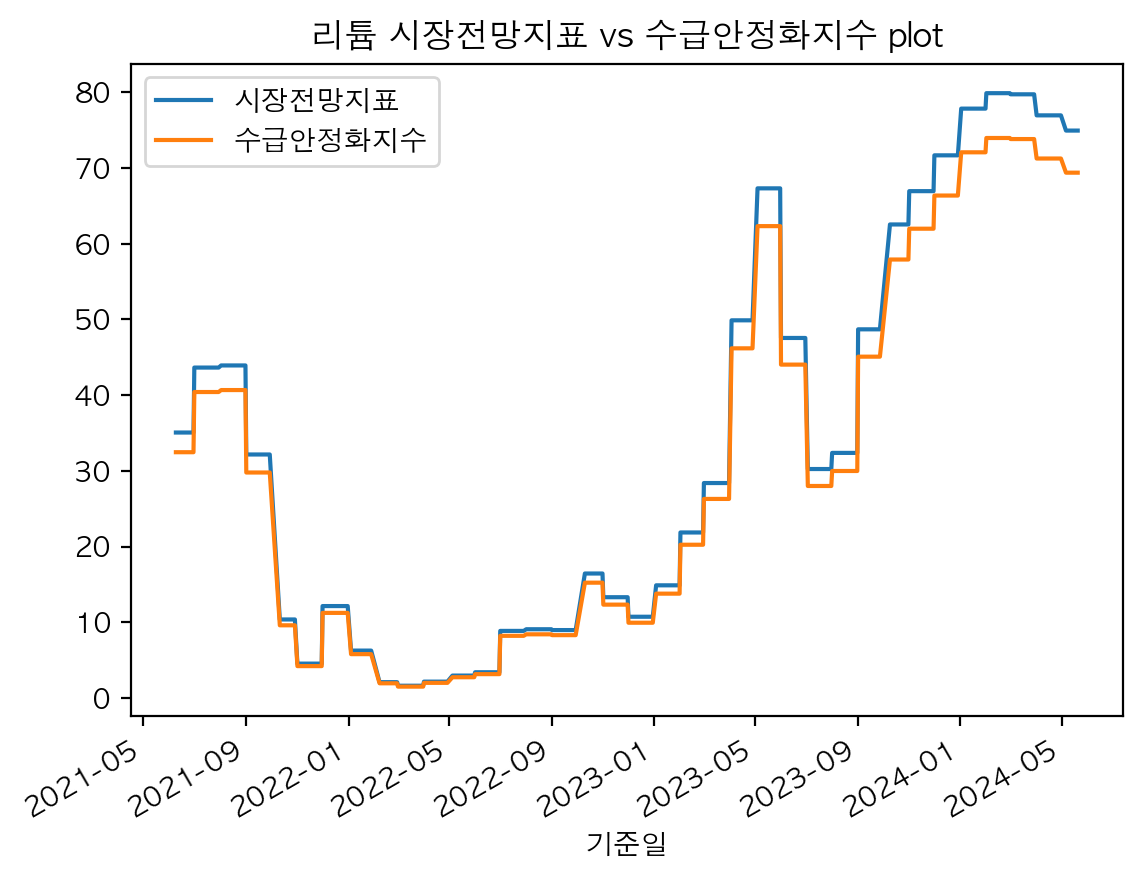

In [7]:
df[['시장전망지표','수급안정화지수']].plot()
plt.title('리튬 시장전망지표 vs 수급안정화지수 plot')
plt.show()

시장전망지표와 수급안정화지수는 상관관계가 서로 1이였으며, 그래프 확인 결과 값의 흐름도 똑같음. 따라서 하나의 변수만 써도 충분하다 판단하였음.

### 리튬가격과 희유금속지수 plot

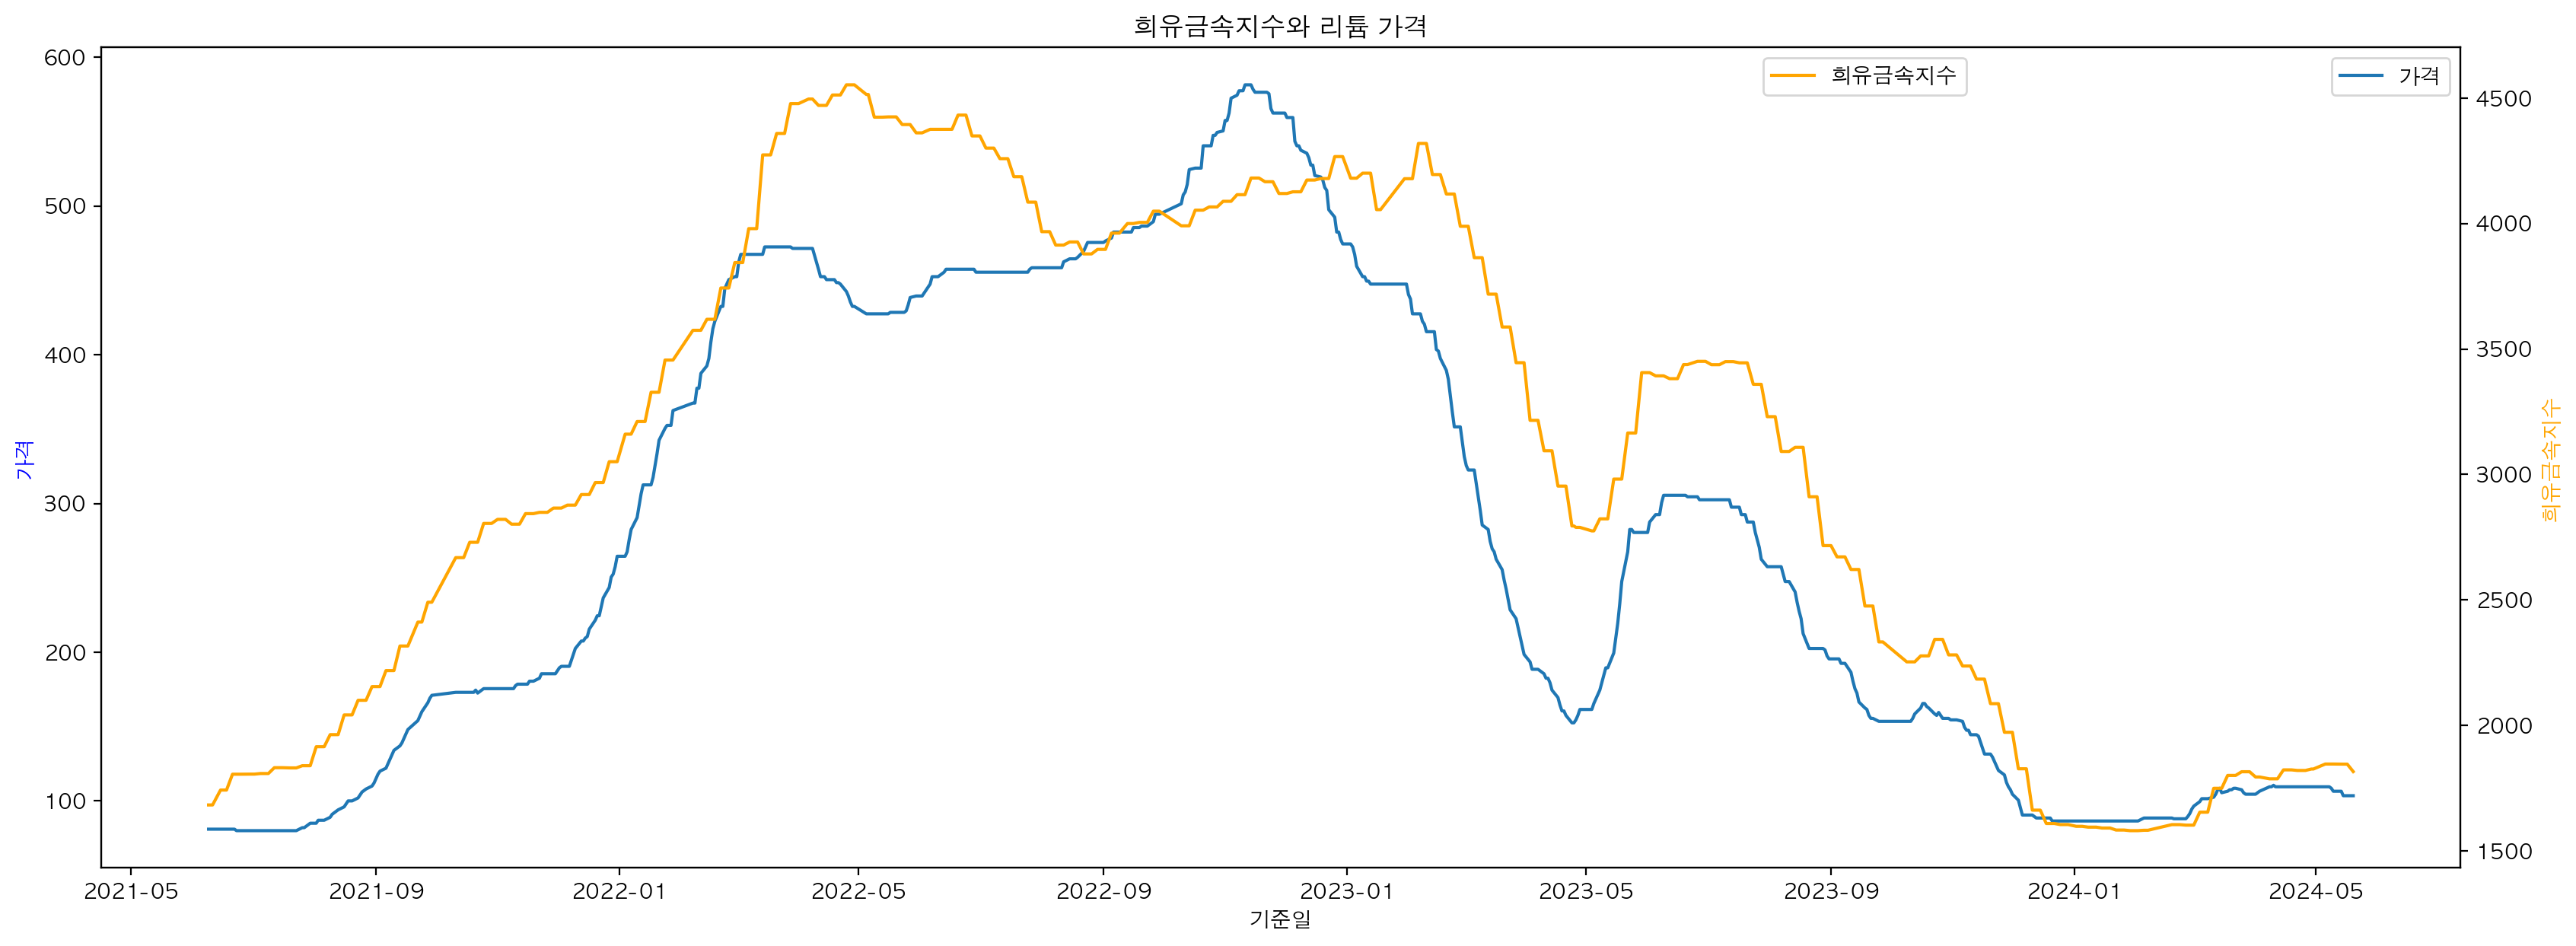

In [29]:
plt.figure(figsize=(20, 7))
# 가격 대한 선 그래프 (왼쪽 y축 사용)
ax1 = sns.lineplot( x=df.index, y='기준가격', data=df, label='가격', ci = None)

# 오른쪽 y축 설정
ax2 = ax1.twinx()

# 희유금속지수 대한 선 그래프 (오른쪽 y축 사용)
sns.lineplot(x=df.index, y='희유금속지수', data=df, color='orange', label='희유금속지수', ax=ax2, ci = None)

# 각 y축에 대한 레이블 설정
ax1.set_ylabel('가격', color='blue')
ax2.set_ylabel('희유금속지수', color='orange')
# 타이틀과 범례 설정
plt.title('희유금속지수와 리튬 가격')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# x축 레이블 설정
plt.xlabel('기준일')

# 그래프 표시
plt.show()